<a href="https://colab.research.google.com/github/Sjoerd-de-Witte/Machine-Learning-2023/blob/main/3_5_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown -O /tmp/ml.py 174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
%run /tmp/ml.py

Downloading...
From: https://drive.google.com/uc?id=174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
To: /tmp/ml.py
100% 1.31k/1.31k [00:00<00:00, 5.76MB/s]


# Cross Validation

We will start by loading the Wine data set for classification.

In [2]:
from pipetorch import DFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pipetorch.evaluate.study import Study

In [3]:
df = DFrame.read_from_kaggle('uciml/red-wine-quality-cortez-et-al-2009')
df.quality = df.quality > 5

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False


In [6]:
# Split the dataset in a train, validation and test part using SKLearn's train_test_split method twice.
# create train_X, valid_X, test_X, train_y, etc.
y = df['quality']
X = df.drop(columns=['quality'])
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

###

In [7]:
# Learn a decision tree max_depth=4 on the training set and report the accuracy
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7833333333333333

In [8]:
study = Study.create_study('acc_valid', 'acc_test')

# for this study with two objectives, write a trial function that returns the validatioon and test accuracy
# and run the optimizer

def objective(trial):
    # Define the hyperparameters to search
    max_depth = trial.suggest_int('max_depth', 1, 10)
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate the validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test)

    # Calculate the test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Report the validation and test accuracy as objectives
    return val_accuracy, test_accuracy

# Optimize the objectives using the objective function
study.optimize(objective, n_trials=100)  # You can adjust the number of trials as needed


[I 2023-10-02 15:48:18,524] A new study created in memory with name: no-name-ca4c80d6-7c66-45bb-b0d2-b10985104ee7
[I 2023-10-02 15:48:18,549] Trial 0 finished with values: [0.725, 0.7416666666666667] and parameters: {'max_depth': 6}. 
[I 2023-10-02 15:48:18,747] Trial 1 finished with values: [0.725, 0.7166666666666667] and parameters: {'max_depth': 9}. 
[I 2023-10-02 15:48:18,936] Trial 2 finished with values: [0.7208333333333333, 0.7375] and parameters: {'max_depth': 8}. 
[I 2023-10-02 15:48:19,136] Trial 3 finished with values: [0.75, 0.7375] and parameters: {'max_depth': 10}. 
[I 2023-10-02 15:48:19,327] Trial 4 finished with values: [0.6958333333333333, 0.7416666666666667] and parameters: {'max_depth': 8}. 
[I 2023-10-02 15:48:19,527] Trial 5 finished with values: [0.725, 0.7416666666666667] and parameters: {'max_depth': 5}. 
[I 2023-10-02 15:48:19,723] Trial 6 finished with values: [0.7291666666666666, 0.7291666666666666] and parameters: {'max_depth': 7}. 
[I 2023-10-02 15:48:19,9

<Axes: xlabel='parametersetting'>

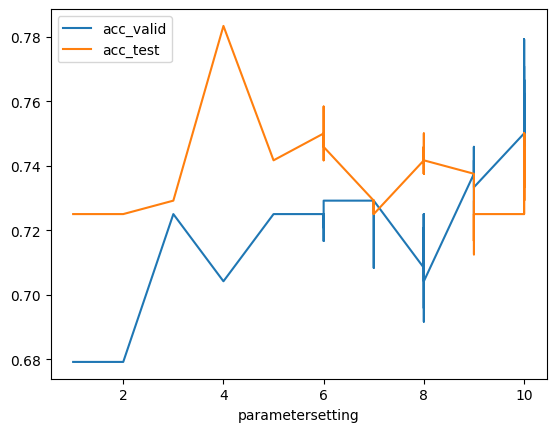

In [12]:
# Plot the results
# Are the validation results much different from the test results? what do you conclude?
study.plot_targets()

In [ ]:
halt_notebook()